In [ ]:
%cd /home/andreasstillits/coding/Leaves1D/PNAS_REVIEW

from review.utils.plotfunctions import show_mesh 

# show_mesh("files/meshes/cylinder_max.msh")

/home/andreasstillits/coding/Leaves1D/PNAS_REVIEW


X_ChangeProperty: BadValue (integer parameter out of range for operation) 0x0


Case A Summary - Min: 0.1%, Mean: 18.8%, Max: 154.6%

Case B Summary - Min: 1.9%, Mean: 11.6%, Max: 969.9%

Case C Summary - Min: 3.9%, Mean: 14.1%, Max: 618.1%

Case D Summary - Min: 4.5%, Mean: 43.2%, Max: 6243.4%

Case E Summary - Min: 17.6%, Mean: 206.5%, Max: 20013.7%



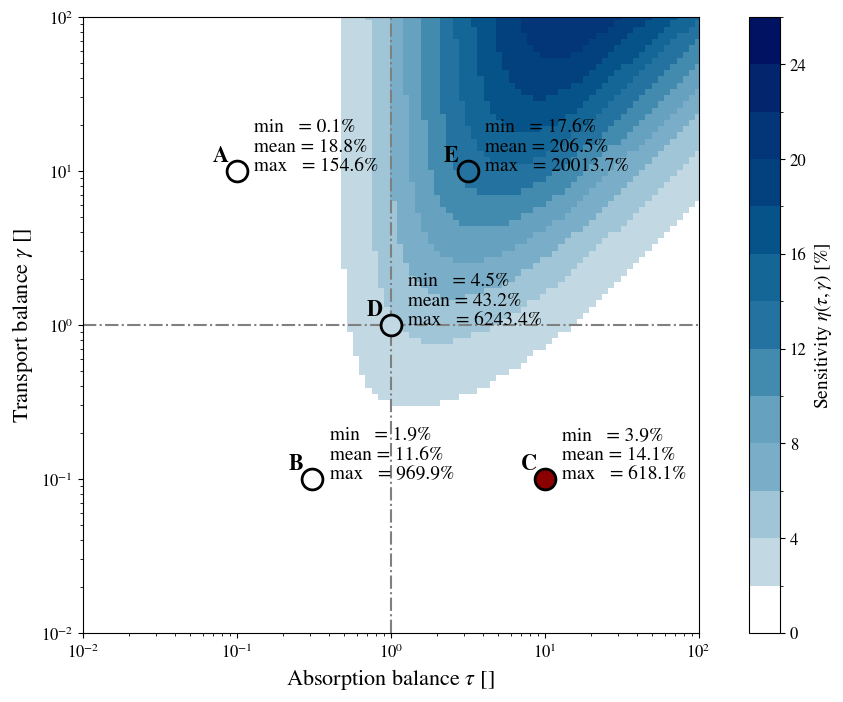

In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
from review.utils.plotfunctions import plot_sensitivity_map, get_blue_cmap
from review.utils.constants import ThreeDimExploration, Cases
constants = ThreeDimExploration()

def get_rel_diff_for_case(case: str) -> None:
    rel_diffs = []
    versions = ["min", "mean", "max"]
    for version in versions:
        filename = constants.get_base_path(version) / f"solution{case}_summary.txt"
        
        data = np.loadtxt(filename, delimiter=";")
        rel_diffs.append(data[2])  # Assuming the 4th column contains the relative differences
    return rel_diffs

for case in ["A", "B", "C", "D", "E"]:
    min_, mean_, max_ = get_rel_diff_for_case(case)
    print(f"Case {case} Summary - Min: {100*min_:.1f}%, Mean: {100*mean_:.1f}%, Max: {100*max_:.1f}%\n")


def plot_threedim_sensitivity_map():
    fig, ax = plt.subplots(figsize=(13, 8))
    im = plot_sensitivity_map("files/nonlinear_sensitivities/sensitivities_mu0.00_.txt", ax=ax)
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(r'Sensitivity $\eta(\tau, \gamma)$ [%]')
    ax.set_xlabel(r'Absorption balance $\tau$ []', fontsize=16)
    ax.set_ylabel(r'Transport balance $\gamma$ []', fontsize=16)
    # place circles for cases A - E
    cases = Cases()
    labels = ["A", "B", "C", "D", "E"]
    circles = []
    for label in labels:
        tau, gamma, chi_ = cases.get_case_params(label)
        circles.append((tau, gamma))
    # plot circles
    cmap, norm = get_blue_cmap((0, 26, 14))
    colors = ['white', 'white', 'darkred', cmap(norm(3)), cmap(norm(12))]
    for label, color, (tau, gamma) in zip(labels, colors, circles):
        ax.plot(tau, gamma, marker='o', markersize=15, markeredgecolor='black', markeredgewidth=2, markerfacecolor=color)
        ax.text(tau*0.70, gamma*1.15, label, color='black', fontsize=16, fontweight='bold')
    
    def _assign_info(case: str, loc: list[float] = [1.20, 1.0]) -> None:
        tau, gamma, chi_ = cases.get_case_params(case)
        min_, mean_, max_ = get_rel_diff_for_case(case)
        ax.text(tau*loc[0], gamma*loc[1], f' min   = {100*min_:.1f}% \n mean = {100*mean_:.1f}% \n max   = {100*max_:.1f}%', color='black', fontsize=14)

    _assign_info("A")
    _assign_info("B")
    _assign_info("C")
    _assign_info("D")
    _assign_info("E")
    plt.show()

plot_threedim_sensitivity_map()